# **This is the clustering model for credit card dataset**

In [243]:
#importing libraries'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set(style="darkgrid")

In [244]:
#importing the dataset
def generate_data(location:str,sample_number=10):
  data=pd.read_csv(location,engine='python')
  head=data.head()
  tail=data.tail()
  sample=data.sample(sample_number)
  description=data.describe()
  columns=data.columns
  info=data.info()
  shape=data.shape
  size=data.size
  return {'data':data,'head':head,'tail':tail,'sample':sample,'description':description,'columns':columns,'info':info,
          'shape':shape,'size':size}


In [249]:
data=generate_data('/content/CC GENERAL.csv')['data']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [250]:
data.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [154]:
data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [155]:
data.sample(13)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5489,C15643,5825.287700,1.000000,230.00,230.00,0.00,1909.594385,0.083333,0.083333,0.000000,0.250000,3,1,7000.0,1537.817125,1442.075559,0.000000,12
8525,C18756,1619.881506,1.000000,441.18,50.00,391.18,700.951557,0.500000,0.083333,0.500000,0.166667,4,12,3000.0,963.141799,370.576176,0.000000,12
2436,C12510,1961.322415,1.000000,476.16,0.00,476.16,0.000000,1.000000,0.000000,1.000000,0.000000,0,48,2000.0,791.091826,768.758551,0.000000,12
6217,C16390,857.767403,1.000000,639.56,0.00,639.56,0.000000,0.250000,0.000000,0.250000,0.000000,0,4,2200.0,210.272469,254.976679,0.000000,12
3377,C13473,1694.125362,1.000000,437.52,172.60,264.92,0.000000,0.916667,0.166667,0.916667,0.000000,0,13,1800.0,797.134098,666.656548,0.000000,12
2304,C12375,933.150722,0.727273,0.00,0.00,0.00,1374.764359,0.000000,0.000000,0.000000,0.090909,1,0,1500.0,360.729411,335.993476,0.000000,11
4552,C14678,3219.604215,1.000000,4126.75,4126.75,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,31,10500.0,6061.100911,1113.256834,0.000000,12
2498,C12572,220.938626,1.000000,2310.61,1375.61,935.00,0.000000,1.000000,1.000000,0.500000,0.000000,0,33,18000.0,2588.893066,190.034881,1.000000,12
7553,C17757,2017.391656,1.000000,12024.37,11224.10,800.27,0.000000,1.000000,1.000000,0.500000,0.000000,0,133,8000.0,11516.392320,556.651236,0.333333,12
7381,C17582,18.120946,0.500000,57.00,57.00,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,1500.0,118.438703,54.138711,0.000000,6


In [156]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


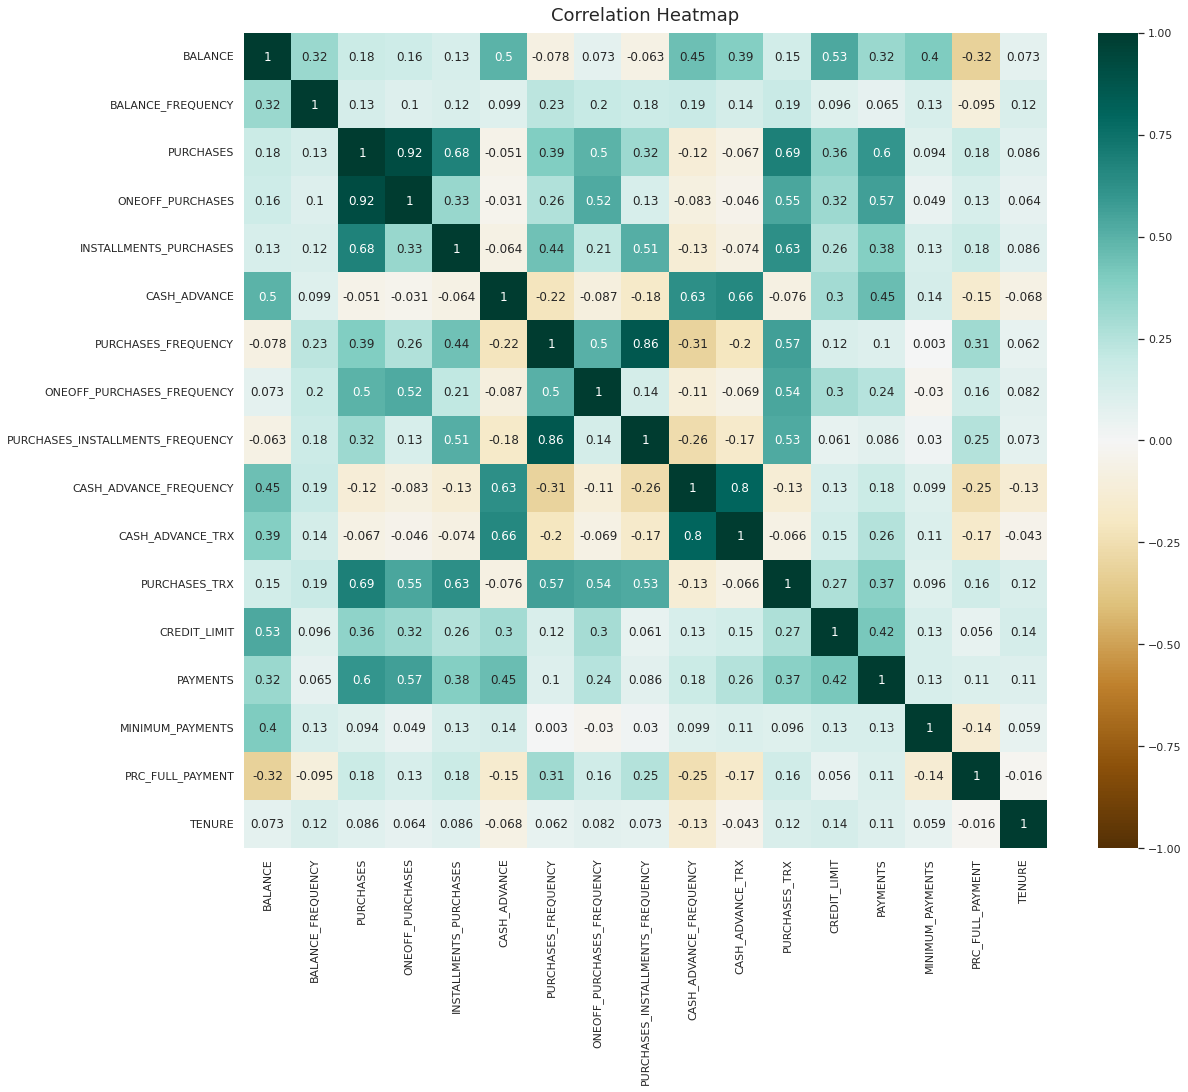

In [157]:
#correlation
#analyzing the datasets via a heat map to tudy the correlation between the features
def create_heat_map(data):
  #correalation between varaibles
  plt.figure(figsize=(18, 15))
  heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
  heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
  # save heatmap as .png file
  # dpi - sets the resolution of the saved image in dots/inches
  # bbox_inches - when set to 'tight' - does not allow the labels to be cropped
  plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')# this will will also return two dataset one being the original one and second one will be the one in
create_heat_map(data)

In [251]:
#data preprocessing steps
def get_type(data):
  numeric=[]
  categorical=[]
  for col in data.columns:
    if data[f'{col}'].dtypes == 'object':
      categorical.append(col)
    else:
      numeric.append(col)
  return {'numeric':numeric,'categorical':categorical}

In [252]:
# check for null values and deal with them
# this function will take the type of process as well for both numeric and categorical data
def treat_null_values(data,numeric_type:str='mean'):
  types=get_type(data)
  numeric=types['numeric']
  categorical=types['categorical']
  if numeric_type == 'mean':
    for col in numeric:
      data[f'{col}']=data[f'{col}'].fillna(data[f'{col}'].mean())
  elif numeric_type == 'mode':
    for col in numeric:
      data[f'{col}']=data[f'{col}'].fillna(data[f'{col}'].mode())
  elif numeric_type == 'median':
    for col in numeric:
      data[f'{col}']=data[f'{col}'].fillna(data[f'{col}'].median())
  elif numeric_type == 'frequent':
    for col in numeric:
      data[f'{col}']=data[f'{col}'].fillna(data[f'{col}'].nunique[0])
  elif numeric_type == 'drop':
    for col in numeric:
      data[f'{col}']=data[f'{col}'].dropnna(inplace=True)
  elif numeric_type == 'predictive_modeling':
    pass # create a seprate function for this
  elif numeric_type == 'impute':
    pass # create a seprate function for this as well
  
  for col in categorical:
    most_frequent_category=data[f'{col}'].mode()[0]
    data[f'{col}'].fillna(most_frequent_category,inplace=True)
  return data

  

def predictive_modeling():
  pass #do a detailed study as disadvantages for this model usually outweights advantages
def multiple_imputation():
  from fancyimpute import IterativeImputer as MICE
  data= pd.DataFrame(MICE().fit_transform(data))
  return data

In [253]:
def encode_data(data,multiclass:str='One_hot',binary_class:str='Label'): #this function takes three args one is the data 2nd is the type of encoding for multiclass data and third is the encoding for binary class data
  categorical=get_type(data)['categorical']
  multivariate=[]
  bivariate=[]
  for col in categorical:
    if data[f'{col}'].nunique()>2:
      multivariate.append(col)
    else:
      bivariate.append(col)
  
  if multiclass == 'One_hot':
    for col in multivariate:
      data=encode_and_bind(data,col)
  if binary_class == 'Label':
    for col in bivariate:
      data=label_encode(data,col)
  # add other sorting techniques as well in here
  return data

def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res.pop(feature_to_encode)
    return(res)

def label_encode(data,col):
  from sklearn.preprocessing import LabelEncoder
  encoder=LabelEncoder()
  data[col]=encoder.fit_transform(data[col])
  return data
  
# this function needs to be modified therefore add differenr sort of encoding techniques as well in this cll

In [254]:
def treat_outliers(data,feature:str,algo:str='IQR',z_threshold:int=3,add_feature=None,remove:bool=False,scatter:bool=False,feature_x=None,feature_y=None): # this function takes two arguments one is data and 2ns is the algorithm
  pass
  if scatter == True:
    px.scatter(data,x=feature_x,y=feature_y,hover_name='Country')
  else:
    if algo == 'IQR':
      outlier_index=Inter_quantile_range(data,feature)
    if algo == 'EEA': # elliptic envelope algo
      outlier_index=Elliptice_envelope_algo(data,feature,add_feature)
    if algo == 'ISF': # Isolate forest algo
      outlier_index=Isolate_forest_algo(data,feature)
    if algo == 'One_classSVM': # one class svm
      outlier_index=One_class_SVM(data,feature)
    if algo == 'LOF':
      outlier_index=Local_factor_outlier(data,feature)
    if algo == 'Z_score':
      outlier_index=Z_score_algo(data,feature,z_threshold)
    print(outlier_index)
    if remove == True:
      data=remove_outliers(outlier_index,data)
    
    return data
    


# in all these function display the index of outliers

def Local_factor_outlier(data,feature):
  import numpy as np 
  from sklearn.neighbors import LocalOutlierFactor
  X=data[[feature,data.columns.values[-1]]]
  lof = LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                         metric='minkowski', contamination=0.04,
                         novelty=False, n_jobs=-1)
  pred = lof.fit_predict(X)
  outlier_index = np.where(pred==-1)
  return outlier_index

def One_class_SVM(data,feature): #this returns novelty I am guessing so fuck this method
  import numpy as np
  from sklearn.svm import OneClassSVM
  X=data[[feature,data.columns.values[-1]]]
  one_class_svm = OneClassSVM(kernel='rbf', degree=3, gamma='scale')
  new_data = np.array([[-4, 8.5]])# change these values as per your dataset
  one_class_svm.fit(X)
  pred = one_class_svm.predict(new_data)
  outlier_index = np.where(pred==-1)
  return outlier_index

def Isolate_forest_algo(data,feature):
  import numpy as np
  from sklearn.ensemble import IsolationForest
  from sklearn.decomposition import PCA
  from sklearn.preprocessing import StandardScaler
  X=data[[feature,data.columns.values[-1]]]
   # Returns 1 of inliers, -1 for outliers
  iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.05, max_features=1.0, 
                          bootstrap=False, n_jobs=-1, random_state=1)
  pred = iforest.fit_predict(X)
 # Extract outliers
  outlier_index = np.where(pred==-1)
  return outlier_index

def Elliptice_envelope_algo(data,feature,add_feature):
  import numpy as np
  from sklearn.covariance import EllipticEnvelope
  elpenv = EllipticEnvelope(contamination=0.025, 
                          random_state=1)
  X=data[[feature,add_feature]]
# Returns 1 of inliers, -1 for outliers
  pred = elpenv.fit_predict(X)

# Extract outliers
  outlier_index = np.where(pred==-1)
  return outlier_index

def Inter_quantile_range(data,feature):
  Q1 = np.percentile(data[f'{feature}'], 25, interpolation = 'midpoint') 
  Q2 = np.percentile(data[f'{feature}'], 50, interpolation = 'midpoint') 
  Q3 = np.percentile(data[f'{feature}'], 75, interpolation = 'midpoint') 
  IQR = Q3 - Q1 
  low_lim = Q1 - 1.5 * IQR
  up_lim = Q3 + 1.5 * IQR
  outlier_index=[]
  for val in data[f'{feature}']:
    if val > up_lim or val <low_lim:
      outlier_index.append(data.index[data[f'{feature}'] == val].values[0])
  return outlier_index
         
def Z_score_algo(data,feature,z_threshold):
  mean = np.mean(data[f'{feature}'])
  std = np.std(data[f'{feature}'])
  print('mean of the dataset is', mean)
  print('std. deviation is', std)
  outlier_index = []
  for val in data[f'{feature}']:
    z = (val-mean)/std
    if z > z_threshold:
      outlier_index.append(data.index[data[f'{feature}'] == val].values[0])
  return outlier_index
  


# this function will remove the outliers if removal is allowed
def remove_outliers(index,data):
  for row in index:
    data.drop([row])
    print(f'dropped value at index {row}')
  return data

      

# if remove is true remove outliers else if it is false just return the index of outliers
# this will function will be returning two datasets the original one and one in which all the outliers are removed



In [255]:
#since we are not filtering for any dependent variable in the clustering therefore feature is not require
def preprocess_data(data):
  data=treat_null_values(data)
  data=encode_data(data)
  return data

# call outliers and balance function independentlu whenever you like and PS Fuck Roopa


In [256]:
#dropping CUST_ID since it is not related to data and will just increase the dimension of the data
data.drop('CUST_ID',inplace=True,axis=1)

In [257]:
data=preprocess_data(data)

In [165]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#Visualizing the processed data

In [117]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [52]:
px.scatter(data, x="BALANCE", y="BALANCE_FREQUENCY", color="PURCHASES",
                 size='ONEOFF_PURCHASES', hover_data=['ONEOFF_PURCHASES'])

In [53]:
px.scatter(data, x="BALANCE", y="BALANCE_FREQUENCY", color="PURCHASES",
                 size='INSTALLMENTS_PURCHASES', hover_data=['INSTALLMENTS_PURCHASES'])

In [54]:
px.scatter(data, x="BALANCE", y="BALANCE_FREQUENCY", color="PURCHASES",
                 size='CASH_ADVANCE', hover_data=['CASH_ADVANCE'])

In [55]:
px.scatter(data, x="BALANCE", y="BALANCE_FREQUENCY", color="PURCHASES",
                 size='PURCHASES_FREQUENCY', hover_data=['PURCHASES_FREQUENCY'])

In [339]:
def reduced_Dataset(data,reduction:int,method:str='PCA'):
  if method == 'PCA':
    return PCA(data,reduction)
 
  elif method == 'Kernel':
    return KernelPCA(data,reduction)

#go with pca since kernel pca might take quite  a long time
  


def PCA(data,reduction):
  from sklearn.decomposition import PCA
  pca=PCA(n_components=reduction)#n_component=reduced dimension of dataset
  reduced_data=pca.fit_transform(data)
  return reduced_data

def KernelPCA(data,reduction):
  from sklearn.decomposition import KernelPCA
  pca=KernelPCA(n_components=reduction,kernel='rbf')
  reduced_data=pca.fit_transform(data)
  return reduced_data



In [119]:
#going with this data
data.shape

(8950, 17)

In [120]:
#k-mean clustering

#radom initializtion trap is taken care of automatically since the algoo implemented is k-means++
def kmeansClustering(data,nClusters):
  from sklearn.cluster import KMeans
  kmeans = KMeans(n_clusters = nClusters, init = 'k-means++', random_state = 42)
  y_kmeans = kmeans.fit_predict(data)
  return y_kmeans
  

def elbowMethod(data,min:int=2,max:int=20):
  from sklearn.cluster import KMeans
  wcss = []#within cluster sum of squares we use this matrice to define the effciecy of model foer k number of clusters
  for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
  plt.plot(range(1, 11), wcss)
  plt.title('The Elbow Method')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  plt.show()

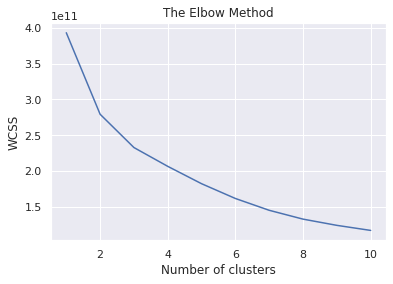

In [64]:
elbowMethod(data)

In [265]:
kmeansCluster=kmeansClustering(data,3)

In [60]:
#Hierarchial clustering
def HierarchialClustering(data,nClusters:int,affinity:str='euclidean',linkage:str='ward'):
  from sklearn.cluster import AgglomerativeClustering
  hc = AgglomerativeClustering(n_clusters = nClusters, affinity = affinity, linkage = linkage)
  y_hc = hc.fit_predict(data)
  return y_hc
def createDendogram(data):
  import scipy.cluster.hierarchy as sch
  dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'))
  # ward is the clusering techniique best suited for hierarchial clustering




  # ward stands for minimum variance
  plt.title('Dendrogram')
  plt.ylabel('Euclidean distances')
  plt.show()

In [ ]:
createDendogram(data)

In [266]:
hierarchialCluster=HierarchialClustering(data,3)

In [68]:
#Mean shift clustering
#note this algorithm is quite clumsy for large datasets
#finding the optimal value of the bandwidth => this will be tackled by the second function
#this requires heavy computational resources so either reduce the dataset first or run it in jupyter notebook
def meanShiftClustering(data):
  from sklearn.cluster import MeanShift
  bandwidth = bandwidthDetermination(data)#this function will give you the otimal value for the bandwidth
  clustering = MeanShift(n_jobs=-1,bandwidth=bandwidth)
  cluster = clustering.fit_predict(data) #this algo will be clumsy for a large dataset
  #runnig time is O(n2)
  return cluster


#this function will return the bandwidth value that will be used in the above function
def bandwidthDetermination(data):
  from sklearn.cluster import estimate_bandwidth
  bandwidth = estimate_bandwidth(data)#for large datasets this will take some time
  return bandwidth



In [260]:
mean_shiftCluster=meanShiftClustering(data)

In [72]:
#minibatch kmeans algorithm
#we basically break the large dataset into small batches
# so that they can be allocated in memmory where as a large dataset can not be allocated into the memmory

def minBatchKmeans(data,nClusters:int,batchSize:int=10,max_iter:int=10):
  from sklearn.cluster import MiniBatchKMeans
  clustering = MiniBatchKMeans(n_clusters=nClusters,batch_size=batchSize,max_iter=max_iter,random_state=42)
  cluster=clustering.fit_predict(data)
  return cluster


In [267]:
min_batchCluster=minBatchKmeans(data,3)

In [79]:
#gaussian mixture models
#thia model can cluster non spherical data and it also
#it's always a good idea to reduce the dataset as it reduces the red flag variables in our dataset
def GMMClustering(data,nComponents:int=2):
  from sklearn.mixture import GaussianMixture
  clustering = GaussianMixture(n_components=nComponents,random_state=42)
  cluster = clustering.fit_predict(data)
  return cluster


In [262]:
gmmCluster=GMMClustering(data)

In [82]:
def birchAlgo(data,nClusters:int=2):
  from sklearn.cluster import Birch
  clustering = Birch(n_clusters = nClusters)#ooh ma good turu lobh
  cluster = clustering.fit_predict(data)
  return cluster


In [263]:
birchCluster=birchAlgo(data)

In [89]:
#in this section you can generate a new dataframe of dimension Nx3 to visualize the clusters
#the thing with  this is that some of the columns do not participate in cluster formation and some do since we applies dimensionality reduction
def generateDataframe(data,feature1,feature2):
  #generating new dataset
  feature1Data = data[feature1]
  feature2Data = data[feature2]
  cluster = data['Cluster']

  index=[]
  for i in range(0,data.shape[0]):
    index.append(i)

  columns = [feature1,feature2,'Cluster']


  data = []
  for feat1,feat2,label in zip(feature1Data,feature2Data,cluster):
    data.append([feat1,feat2,label])

  newData=pd.DataFrame(data=data,index=index,columns=columns)
  return newData


In [91]:
#generating some new datasets
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [235]:
def generateCluster(data,feature1:str,feature2:str,model:str='kMeans'):
  new_data=data
  if 'Cluster' in new_data.columns:
    new_data.drop('Cluster',inplace=True,axis=1)
  if model == 'kMeans':
    new_data.insert(data.shape[1],'Cluster',kmeansCluster)
    new_data=generateDataframe(new_data,feature1,feature2)
    drawVisualizatioN(new_data,feature1,feature2)
  elif model == 'hierarchy':
    new_data.insert(data.shape[1],'Cluster',hierarchialCluster)
    new_data=generateDataframe(new_data,feature1,feature2)
    drawVisualizatioN(new_data,feature1,feature2)
  elif model == 'meanShift':
    new_data.insert(data.shape[1],'Cluster',mean_shiftCluster)
    new_data=generateDataframe(new_data,feature1,feature2)
    drawVisualizatioN(new_data,feature1,feature2)
  elif model == 'minBatch':
    new_data.insert(data.shape[1],'Cluster',min_batchCluster)
    new_data=generateDataframe(new_data,feature1,feature2)
    drawVisualizatioN(new_data,feature1,feature2)
  elif model == 'gmm':
    new_data.insert(data.shape[1],'Cluster',gmmCluster)
    new_data=generateDataframe(new_data,feature1,feature2)
    drawVisualizatioN(new_data,feature1,feature2)
  elif model == 'birch':
    new_data.insert(data.shape[1],'Cluster',birchCluster)
    new_data=generateDataframe(new_data,feature1,feature2)
    drawVisualizatioN(new_data,feature1,feature2)

colors = ['red','blue','magenta','green','cadetblue','chartreuse',
          'chocolate','coral','cornflowerblue','cornsilk','crimson',
          'cyan','darkblue','darkcyan','darkgoldenrod','darkgray'
          ,'dodgerblue','firebrick','floralwhite','forestgreen',
          'fuchsia','gainsboro','ghostwhite','gold','goldenrod','gray','greenyellow',
          'honeydew','hotpink','linen',
          'maroon','mediumaquamarine','olivedrab','tan','teal','thistle','tomato','turquoise','violet',
          'wheat','white','whitesmoke','yellowgreen','antiquewhite','aqua','aquamarine',
          'azure','beige','bisque','black','blanchedalmond',
          'blueviolet','brown','burlywood','indianred',
          'mintcream','mistyrose','moccasin','navajowhite','navy','oldlace','olive','darkmagenta','darkolivegreen',
          'darkorange','darkorchid','indigo','ivory','khaki','lavender','lavenderblush',
          'lawngreen','lemonchiffon','lightblue','lightcoral','darkgreen','darkturquoise','darkviolet','deeppink'
          ,'deepskyblue','dimgray','lightcyan','lightgoldenrodyellow',
          'lightgreen','lightgray','lightpink','lightsalmon','lightseagreen','lightskyblue',
          'lightslategray','lightsteelblue','lightyellow','lime','limegreen',
          'orange','orangered','orchid','palegoldenrod','palegreen','paleturquoise','palevioletred',
          'papayawhip','peachpuff','peru','pink','plum','powderblue','purple','aliceblue','rosybrown','royalblue',
          'saddlebrown','salmon','sandybrown','seagreen','seashell','sienna','silver','skyblue','slateblue',
          'slategray','snow','springgreen','steelblue','yellow',]
def drawVisualizatioN(data,xLabel:str,yLabel:str):
  import random
  classes=data['Cluster'].unique()
  for i in classes:
    plt.scatter(data[data['Cluster'] == i][data.columns[0]],data[data['Cluster'] == i][data.columns[1]],s=100,c=random.choice(colors),label=f'Cluster{i+1}')
  
  plt.title('Cluster of customers based on theri credit card score')
  plt.xlabel(xLabel)
  plt.ylabel(yLabel)
  plt.legend()
  plt.show()

#Generating many visualizations of the cluster using the above function

In [236]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [ ]:
#try different combinations of the features you want to study to visualize the cluster

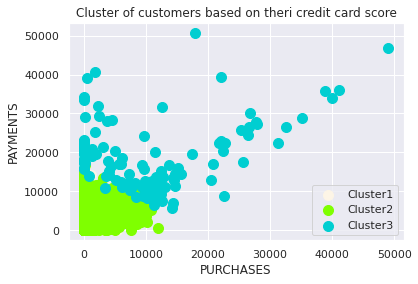

In [338]:
generateCluster(data,'PURCHASES','PAYMENTS')

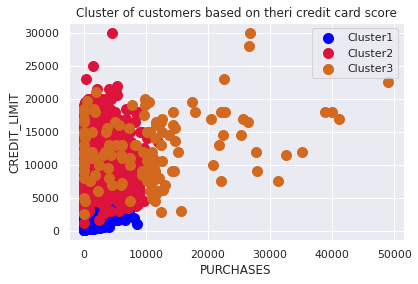

In [336]:
generateCluster(data,'PURCHASES','CREDIT_LIMIT')

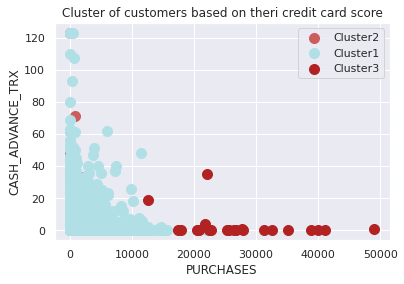

In [322]:
generateCluster(data,'PURCHASES','CASH_ADVANCE_TRX','hierarchy')

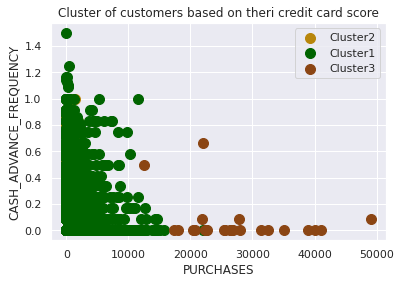

In [319]:
generateCluster(data,'PURCHASES','CASH_ADVANCE_FREQUENCY','hierarchy')

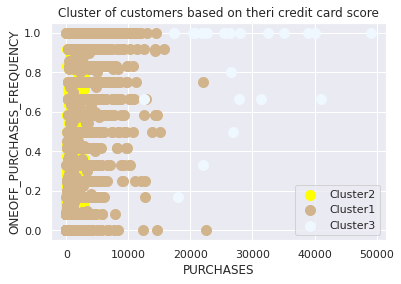

In [311]:
generateCluster(data,'PURCHASES','ONEOFF_PURCHASES_FREQUENCY','hierarchy')

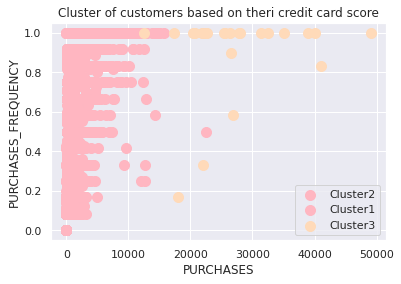

In [309]:
generateCluster(data,'PURCHASES','PURCHASES_FREQUENCY','hierarchy')

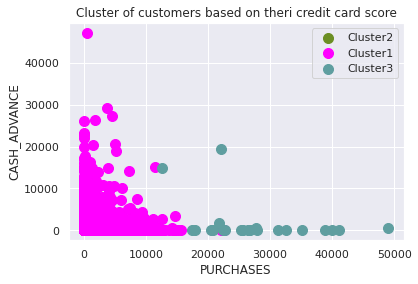

In [307]:
generateCluster(data,'PURCHASES','CASH_ADVANCE','birch')

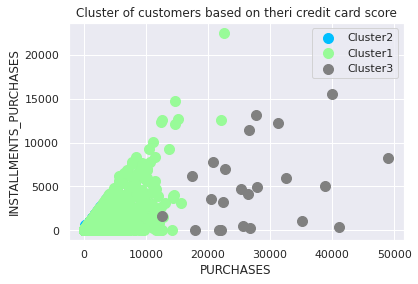

In [304]:
generateCluster(data,'PURCHASES','INSTALLMENTS_PURCHASES','hierarchy')

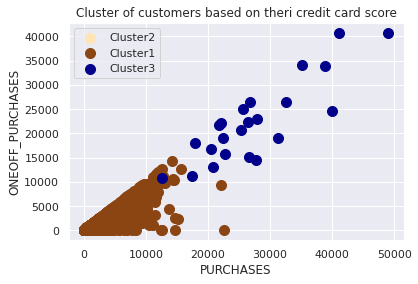

In [298]:
generateCluster(data,'PURCHASES','ONEOFF_PURCHASES','hierarchy')

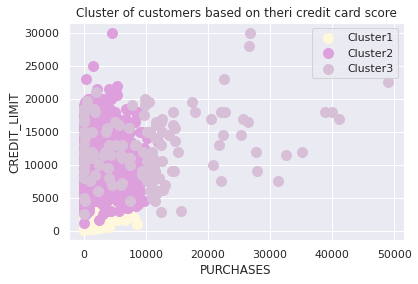

In [278]:
generateCluster(data,'PURCHASES','CREDIT_LIMIT')

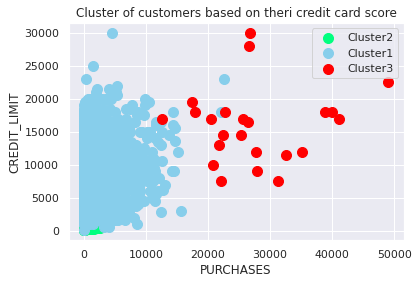

In [277]:
generateCluster(data,'PURCHASES','CREDIT_LIMIT','hierarchy')

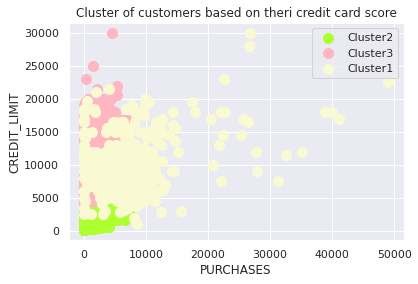

In [280]:
generateCluster(data,'PURCHASES','CREDIT_LIMIT','minBatch')

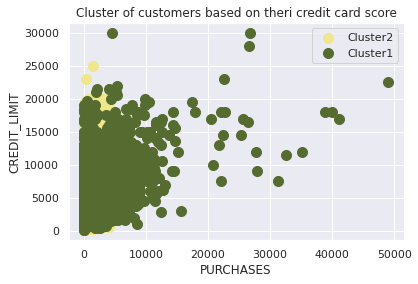

In [281]:
generateCluster(data,'PURCHASES','CREDIT_LIMIT','gmm')

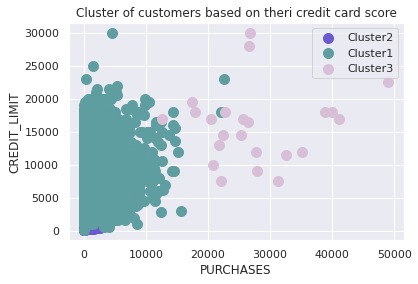

In [282]:
generateCluster(data,'PURCHASES','CREDIT_LIMIT','birch')

#Evaluating the models 